# Yearly SunSpot Numbers from 1700


Sunspots are temporary phenomena on the Sun's photosphere that appear as spots darker than the surrounding areas. They are regions of reduced surface temperature caused by concentrations of magnetic field flux that inhibit convection. Sunspots usually appear in pairs of opposite magnetic polarity. Their number varies according to the approximately 11-year solar cycle. 

Predicting periodicity.
Lets Import necessary libraries

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn

%matplotlib inline

Reading the text file into a pandas dataframe and naming columns.3rd and 4th columns aren't much important we will drop them.

In [203]:
ss= pd.read_fwf('SN_y_tot_V2.0.txt', sep=" ", header=None)
ss.columns = ['Year', 'Yearly Sunspot Number', 'C', 'D'] 
ss.info()
ss.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   321 non-null    float64
 1   Yearly Sunspot Number  321 non-null    float64
 2   C                      321 non-null    float64
 3   D                      321 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 10.2 KB


,Year,Yearly Sunspot Number,C,D
0,1700.5,8.3,-1.0,-1
1,1701.5,18.3,-1.0,-1
2,1702.5,26.7,-1.0,-1
3,1703.5,38.3,-1.0,-1
4,1704.5,60.0,-1.0,-1


we can see there are no null values.The values are also of float and int so we dont need to change type of it.

In [204]:
ss.drop(columns=['C', 'D'],inplace=True)
ss['Year']=ss['Year']-0.5
ss.info()
ss.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   321 non-null    float64
 1   Yearly Sunspot Number  321 non-null    float64
dtypes: float64(2)
memory usage: 5.1 KB


,Year,Yearly Sunspot Number
0,1700.0,8.3
1,1701.0,18.3
2,1702.0,26.7
3,1703.0,38.3
4,1704.0,60.0


stacking vertical subplots with first overall curve and then sunspots in a century

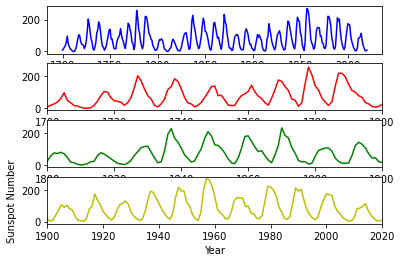

In [205]:
year=ss['Year']
Sunspot=ss['Yearly Sunspot Number']
plt.subplot(411)
plt.plot(year,Sunspot,'b')
plt.subplot(412)
plt.plot(year,Sunspot,'r')
plt.xlim(1700,1800)
plt.subplot(413)
plt.plot(year,Sunspot,'g')
plt.xlim(1800,1900)
plt.subplot(414)
plt.plot(year,Sunspot,'y')
plt.xlim(1900,2020)
plt.xlabel('Year')
plt.ylabel('Sunspot Number')
plt.show()

The curve are similar to one another when we compare them across centuries.It is hard to ignore that there exists a period around 100 years. 

321


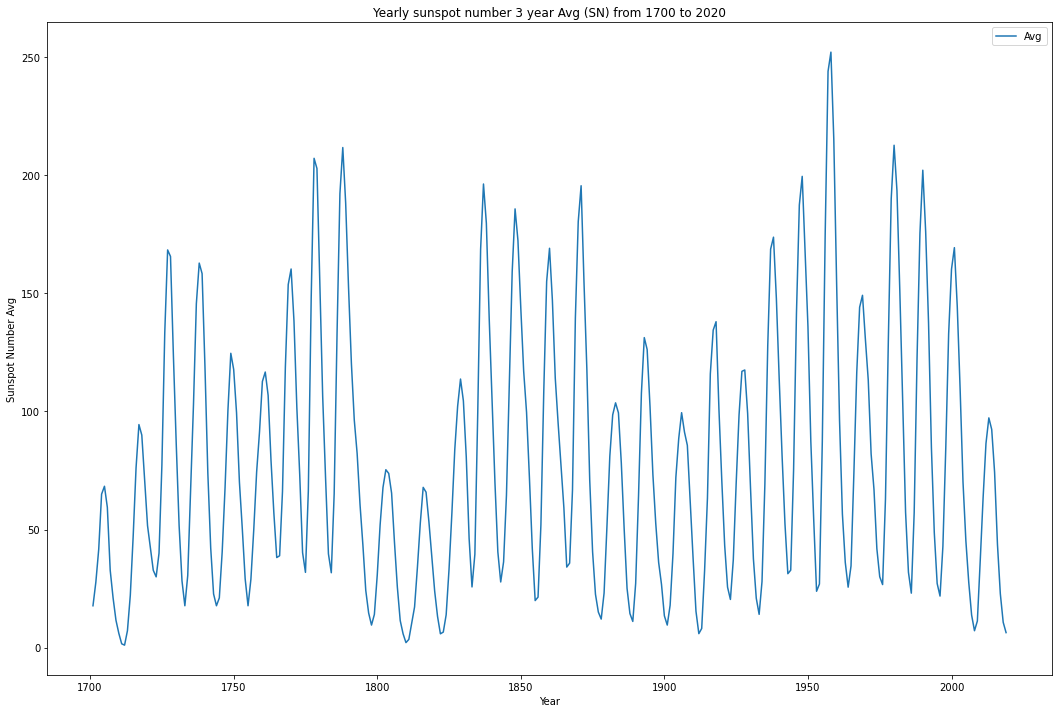

In [206]:
A=[np.nan]
for i in range(0,len(Sunspot)-2):
    A.append((Sunspot[i] +Sunspot[i+1]+Sunspot[i+2])/3)
    
A.append(np.nan)
print(len(A))
ss['Moving Average']=A
avg=ss['Moving Average']
plt.figure(figsize=(18,12))
plt.plot(year,avg,label='Avg')
plt.xlabel('Year')
plt.ylabel('Sunspot Number Avg')
plt.title('Yearly sunspot number 3 year Avg (SN) from 1700 to 2020')
plt.legend()
plt.show()

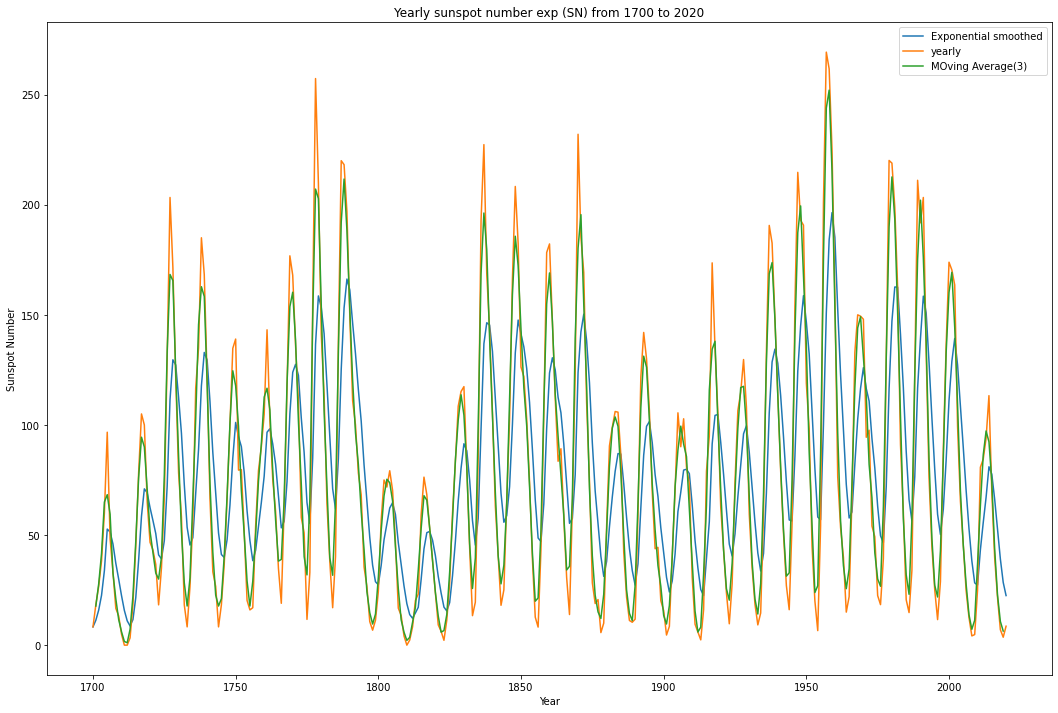

In [207]:
B=[Sunspot[0]]
for i in range(1,len(Sunspot)):
    B.append((0.3*Sunspot[i])+((1-0.3)*B[-1]))
exp=B
plt.figure(figsize=(18,12))
plt.plot(year,exp,label='Exponential smoothed')
plt.plot(year,Sunspot,label='yearly')
plt.plot(year,avg,label='MOving Average(3)')
plt.xlabel('Year')
plt.ylabel('Sunspot Number')
plt.title('Yearly sunspot number exp (SN) from 1700 to 2020')
plt.legend()
plt.savefig('SN.png')
plt.show()

Using fftpack to plot period vs power

<ipython-input-208-b1bc3938b69f>:4: RuntimeWarning: divide by zero encountered in true_divide
  periods = 1 / frequencies


<Figure size 432x288 with 0 Axes>

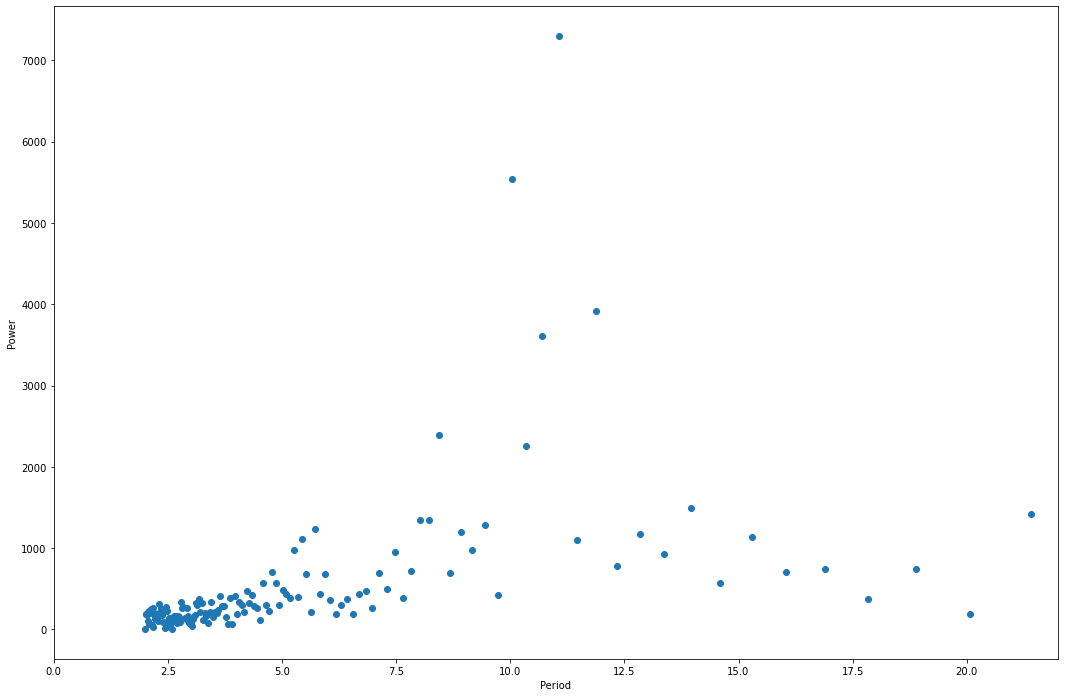

In [208]:
from scipy import fftpack
ft_populations = fftpack.fft(ss[['Yearly Sunspot Number']], axis=0)
frequencies = fftpack.fftfreq(len(ss['Yearly Sunspot Number']), ss['Year'][1] - ss['Year'][0])
periods = 1 / frequencies

plt.figure()
plt.figure(figsize=(18,12))
plt.plot(periods, abs(ft_populations), 'o')
plt.xlim(0, 22)
plt.xlabel('Period')
plt.ylabel('Power')

plt.show()

Again plotting the same but here with exponentially smoothed curve. The highest power is around 10-12 in both curves so the period is around 11. It consists of many periodic curves the highest in the below curve is around 80 years(gleissberg cycle).

<ipython-input-209-59db81586849>:3: RuntimeWarning: divide by zero encountered in true_divide
  periods = 1 / fre


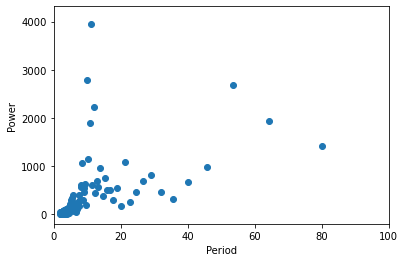

In [209]:
ft_p = fftpack.fft(B, axis=0)
fre= fftpack.fftfreq(len(B), ss['Year'][1] - ss['Year'][0])
periods = 1 / fre

plt.figure()
plt.plot(periods, abs(ft_p), 'o')
plt.xlim(0, 100)
plt.xlabel('Period')
plt.ylabel('Power')

plt.show()


### Auto correlation measures a set of current values against a set of past values and finds whether they correlate.
    
###  Auto correlation is the correlation of one time series data to another time series data which has a time lag.



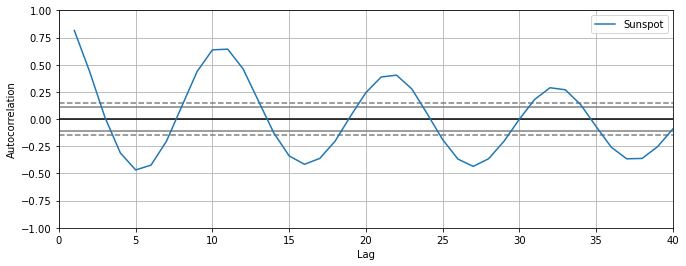

In [210]:
Autocorrelate=np.array(Sunspot, dtype=float)
plt.figure(figsize=(11,4))
pd.plotting.autocorrelation_plot(Autocorrelate, label='Sunspot')
plt.xlim(0,40)
plt.show()

### The first peak (after a lag of 0) is around 11 years, meaning that the series correlates well with itself at a lag time of 11 years. This is the well-known solar activity cycle.

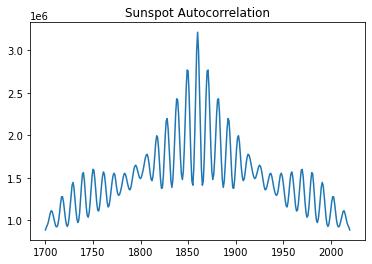

In [211]:
from scipy.signal import correlate
aacorr = np.correlate(Sunspot,Sunspot,mode='same')
plt.figure(7)
plt.plot(year,aacorr)
plt.title('Sunspot Autocorrelation')
plt.show()

Defining a function for moving average

In [212]:
def MovingAverage(n,data):
  Avg=[np.nan]
  for i in range(0,data.shape[0]-n+1):
    sum=0
    for j in range(n):
      sum=sum+data[i+j]
    sum=sum/n
    Avg.append(sum)
  for i in range(n-2):
    Avg.append(np.nan)
  return Avg

In [213]:
move=[]
for i in range(3,23):
  move.append(MovingAverage(i,ss['Yearly Sunspot Number']))

Plotting moving Average

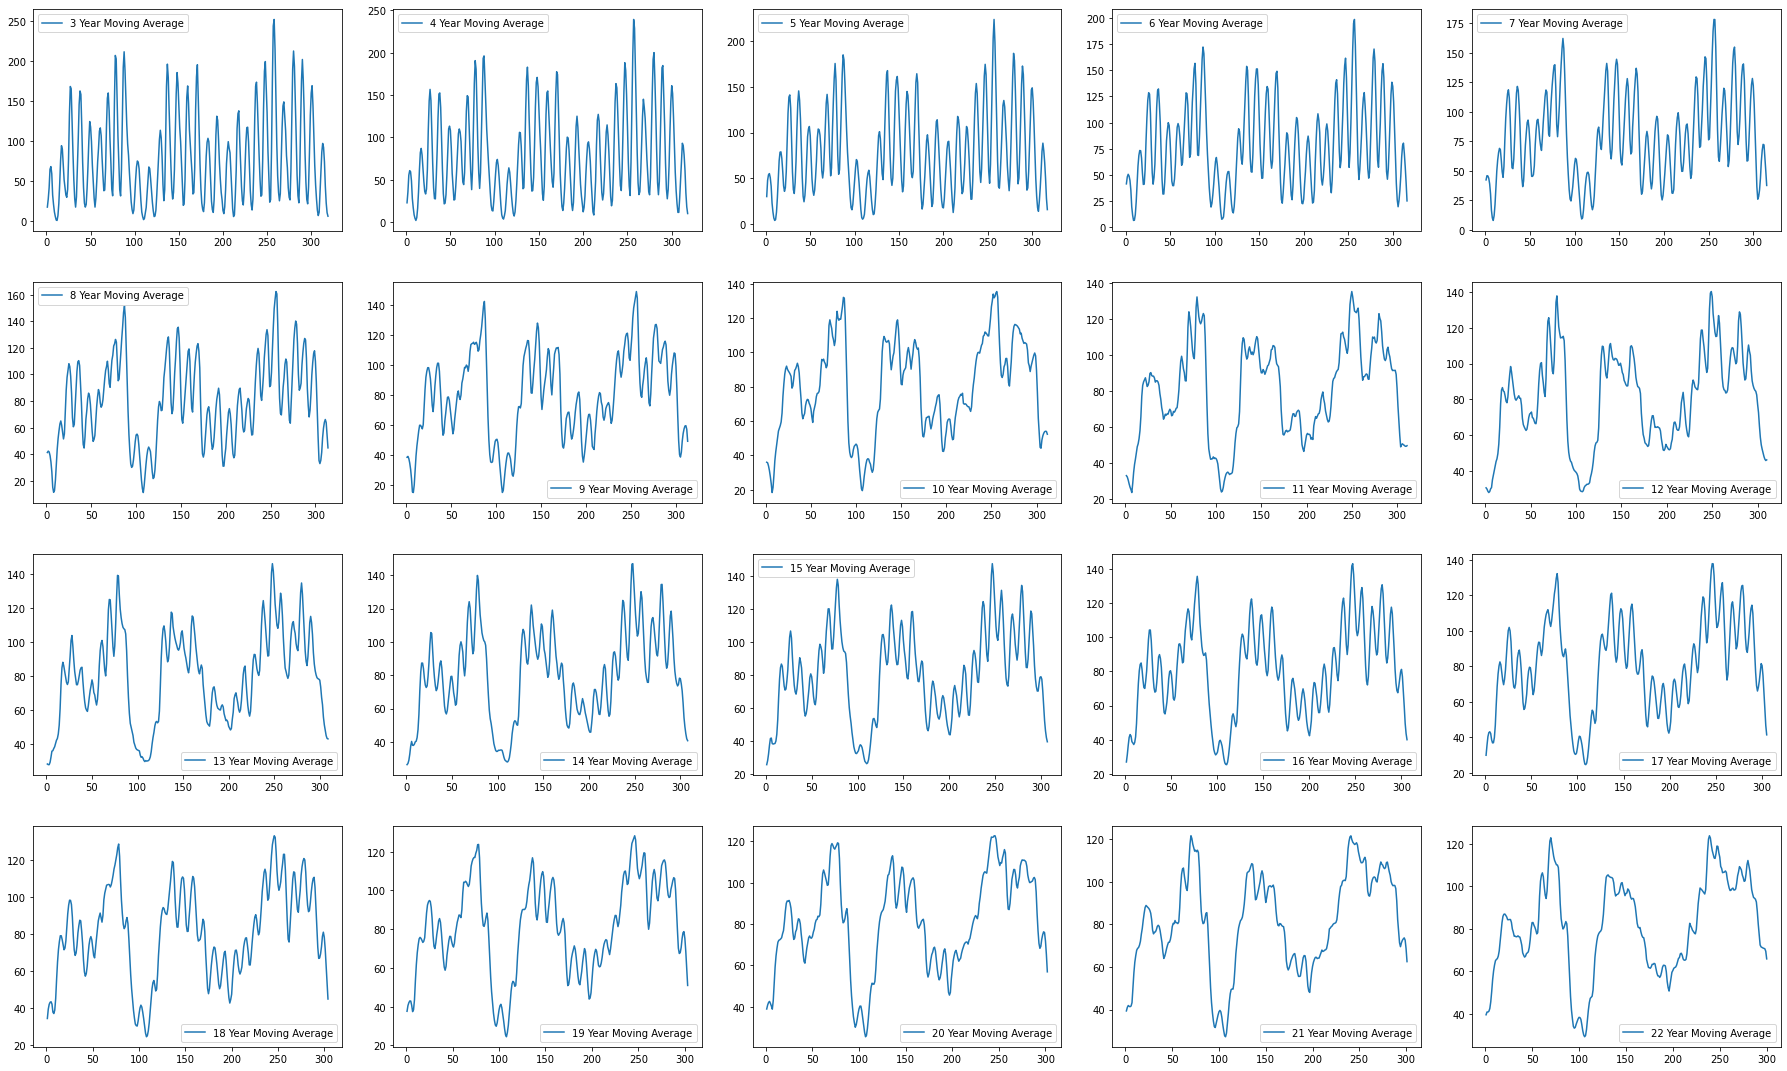

In [214]:
fig, axs = plt.subplots(4,5, figsize=(25, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
fig.tight_layout(h_pad=3.0,w_pad=2.0)

axs = axs.ravel()

for i in range(20):

    axs[i].plot(move[i],label='{} Year Moving Average'.format(i+3))
    axs[i].legend()


#for i in range(17):
  #plt.plot(spot['Year'],move[i],label='{} Year Moving Average'.format(i+3))
  #plt.legend()
  #plt.show()

Function for exponentital smoothing

In [215]:
def expsmooth(alpha,data):
  final=[data[0]]
  for i in range(1,len(data)):
    final.append((alpha*data[i])+((1-alpha)*final[-1]))
  return final

In [216]:
exp=[]
for i in np.arange(0.1,1.1,0.1):
  exp.append(expsmooth(i,ss['Yearly Sunspot Number']))

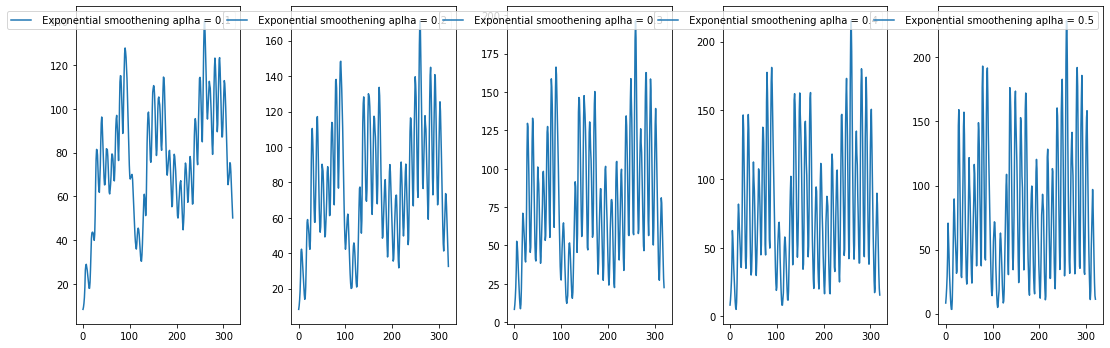

In [217]:
fig, axs = plt.subplots(1,5, figsize=(15, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
fig.tight_layout(h_pad=3.0,w_pad=2.0)

axs = axs.ravel()

for i in range(5):

    #axs[i].plot(spot['Year'],spot['MMS'])
    axs[i].plot(exp[i],label=' Exponential smoothening aplha = {}'.format(round(i/10+0.1,1)))
    
    axs[i].legend()

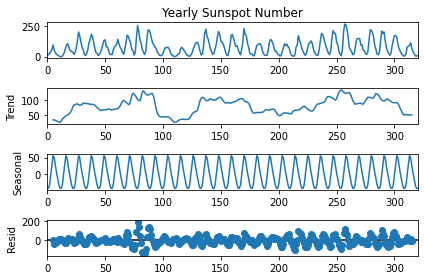

In [218]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ss['Yearly Sunspot Number'], model="additive",period=11) # Data Trend is repeated after every 11 year,freq=11*1
result.plot()
plt.show()

we can see the trend also increasing over the 100 years the decreasing after 100 years further strenghting our intuiton of having a period around 100 years.

Using the trend we can see the cycle strength

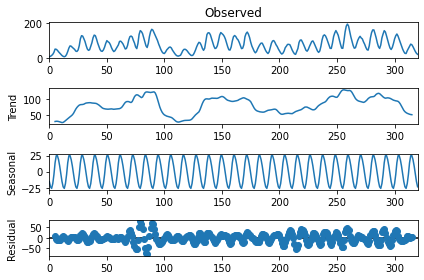

In [219]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(B, model="additive",period=11) # Data Trend is repeated after every 11 year,freq=11*1
result.plot()
plt.show()

The abundance of sunspots on the Sun varies on timescales from a few hours to many years. Historically, an index called the 'sunspot number' has been used to quantify the abundance of spots. This index is still in wide use today, although for some purposes it has been replaced by more readily and consistently measured indices such as the 10.7 centimetre solar flux. The main advantage of the sunspot number is that it is the only index for which we have a long and detailed historical record.

Sunspot Number (here denoted R) is defined as:

R = K * (10 * G + I)

where G is the number of sunspot groups visible on the Sun; I is the total number of individual spots visible; and K is an instrumental factor to take into account differences between observers and observatories.

Sunspot Number as an index can be defined on a daily basis but because of the large day-to-day variation is usually averaged over longer periods, the most common being the monthly and the yearly average. When averaged over a year, the sunspot number varies smoothly charting the progress of the solar cycle. On the other hand the daily and the monthly averages exhibit considerable variation with respect to the yearly curve. This variation is due to bursts of rapid solar region growth often associated with solar flares and other interesting events.

This cycle has been observed for centuries by changes in the Sun's appearance and by terrestrial phenomena such as auroras. Solar activity, driven both by the sunspot cycle and transient aperiodic processes govern the environment of the Solar System planets by creating space weather and impact space- and ground-based technologies as well as the Earth's atmosphere and also possibly climate fluctuations on scales of centuries and longer. 

Accompanying the 11 year quasi-periodicity in sunspots, the large-scale dipolar (north-south) magnetic field component of the Sun also flips every 11 years; however, the peak in the dipolar field lags the peak in the sunspot number, with the former occurring at the minimum between two cycles. Levels of solar radiation and ejection of solar material, the number and size of sunspots, solar flares, and coronal loops all exhibit a synchronized fluctuation, from active to quiet to active again, with a period of 11 years

## Acknowledgements

[Gleissberg_cycle](https://www.scientificamerican.com/article/the-sunspot-cycle-is-more-intricate-than-previously-thought/)
[Sunspot_wiki](https://www.wikiwand.com/en/Sunspot)
[Solarcycle_wiki](https://www.wikiwand.com/en/Solar_cycle#/Recent_cycles)
[Sunspot_number_formula](https://www.sws.bom.gov.au/Educational/2/3/3)